<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningHub/blob/main/Knowledge_Graph/Knowledge_Graph_com_LLM_(LangChain%2BOpenai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Knowledge Graph com LLMs (LangChain+OpenAI)

Este notebook tem como objetivo demonstrar, de forma didática e reproduzível, como **extrair automaticamente um Knowledge Graph a partir de texto em linguagem natural utilizando LLMs**.

A ideia central é mostrar como transformar texto não estruturado em uma **estrutura de grafo composta por entidades (nós) e relações (arestas)**, algo fundamental para aplicações como:

- Knowledge Graphs
- GraphRAG
- Sistemas de recomendação
- Análise semântica
- Integração com bancos de grafos (Neo4j, TigerGraph, etc.)

## ⚙️ Instalação das dependências

In [1]:
!pip install -q langchain langchain-experimental langchain-openai pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


## 🔐 Configuração da API da OpenA

In [6]:
import os

os.environ["OPENAI_API_KEY"] = "SUA_CHAVE_AQUI"

## 📚 Importações

In [3]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import ChatOpenAI
from langchain_core.documents import Document
import pandas as pd

## 📄 Texto de entrada (Português)

Este será o texto base a partir do qual o grafo de conhecimento será extraído.

In [25]:
text = """
Marie Curie foi uma cientista europeia reconhecida mundialmente por suas contribuições
à física e à química.

Marie Curie nasceu no ano de 1867 e possuía nacionalidade polonesa.
Posteriormente, Marie Curie tornou-se naturalizada francesa.

Marie Curie conduziu pesquisas pioneiras na área de radioatividade.
Essas pesquisas tiveram grande impacto no desenvolvimento da ciência moderna.

Marie Curie foi a primeira mulher a ganhar um Prêmio Nobel.
Marie Curie também foi a primeira pessoa a ganhar o Prêmio Nobel duas vezes.
Ela é a única pessoa a ter ganhado o Prêmio Nobel em duas áreas científicas diferentes.

Pierre Curie foi marido de Marie Curie.
Pierre Curie colaborou com Marie Curie em suas pesquisas científicas.

Marie Curie trabalhou na Universidade de Paris.
Em 1906, Marie Curie tornou-se professora da Universidade de Paris,
sendo a primeira mulher a ocupar esse cargo na instituição.

Marie Curie pertenceu à família Curie.
A família Curie possui um legado científico associado a cinco Prêmios Nobel.
"""


## 📑 Criação dos documentos LangChain

No LangChain, o texto é encapsulado em objetos do tipo Document, que funcionam
como a unidade básica de processamento.

In [5]:
documents = [Document(page_content=text)]

## 🤖 Inicialização do LLM (GPT-4o-mini)

Aqui utilizamos o modelo GPT-4o-mini, que possui ótimo custo-benefício para
tarefas de extração estruturada e análise semântica.

In [17]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.9
)

## 🕸️ Transformação de texto em Knowledge Graph

O LLMGraphTransformer é responsável por:

* Identificar entidades relevantes no texto

* Inferir relações semânticas entre essas entidades

* Estruturar o resultado como um grafo

Para tornar o grafo mais controlado e interpretável, vamos restringir os tipos
de relações permitidas.

In [26]:
llm_transformer = LLMGraphTransformer(
    llm=llm,
    # allowed_nodes=["Person","Country"],
    allowed_relationships=[
        "SPOUSE_OF",
        "WORKED_AT",
        "NATIONALITY",
        "BORN_IN",
        "BIRTH_YEAR",
        "WON_AWARD",
        "AFFILIATED_WITH"
    ],
)


In [27]:
graph_documents = llm_transformer.convert_to_graph_documents(documents)

## 📊 Conversão do grafo para DataFrame

Para facilitar análise, visualização e integração com outras ferramentas,
vamos converter as relações do grafo em um DataFrame.

In [28]:
df = pd.DataFrame(columns=["node1", "node2", "relation"])

for edge in graph_documents[0].relationships:
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                {
                    "node1": [edge.source.id],
                    "node2": [edge.target.id],
                    "relation": [edge.type],
                }
            ),
        ],
        ignore_index=True,
    )

df.head(10)


,node1,node2,relation
0,Marie Curie,1867,BORN_IN
1,Marie Curie,Polônia,NATIONALITY
2,Marie Curie,França,NATIONALITY
3,Marie Curie,Prêmio Nobel,WON_AWARD
4,Marie Curie,Pierre Curie,SPOUSE_OF
5,Pierre Curie,Prêmio Nobel,WON_AWARD
6,Marie Curie,Universidade De Paris,WORKED_AT


In [11]:
!pip install -q networkx matplotlib pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00


## 🔷 Visualização com NetworkX

O NetworkX é uma biblioteca clássica para criação e manipulação de grafos em Python.
Aqui vamos utilizá-la para gerar uma visualização simples do grafo extraído.

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(row["node1"], row["node2"], label=row["relation"])


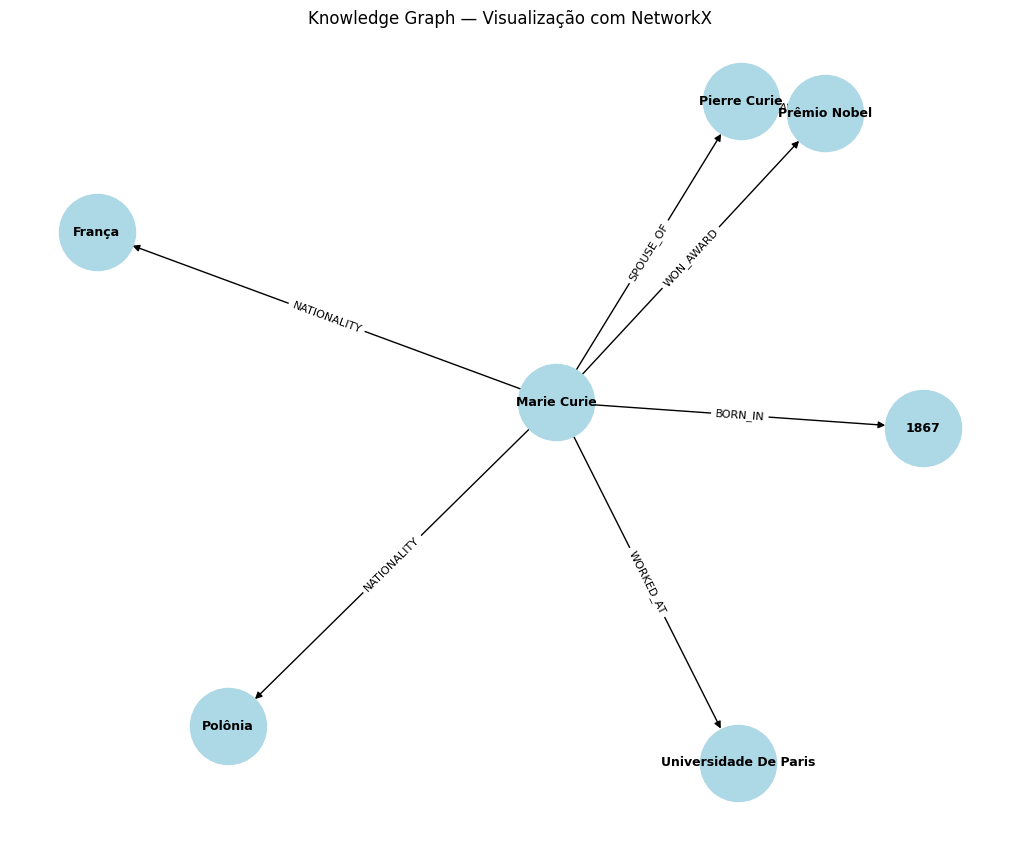

In [30]:
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_size=9,
    font_weight="bold",
    arrows=True
)

edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Knowledge Graph — Visualização com NetworkX")
plt.axis("off")
plt.show()


## 🟣 Visualização interativa com PyVis

O PyVis permite criar grafos interativos diretamente no notebook ou em HTML, facilitando:

* Zoom

* Arrastar nós

* Explorar relações individualmente

In [31]:
from pyvis.network import Network
from IPython.display import HTML, display
net = Network(
    height="600px",
    width="100%",
    bgcolor="#ffffff",
    font_color="black",
    directed=True,
    notebook=True
)


for _, row in df.iterrows():
    net.add_node(row["node1"], label=row["node1"])
    net.add_node(row["node2"], label=row["node2"])
    net.add_edge(
        row["node1"],
        row["node2"],
        label=row["relation"]
    )



In [32]:
net.force_atlas_2based()

In [33]:
net.write_html("knowledge_graph.html")

# display(HTML("knowledge_graph.html"))